## Example of visualizing NetCDF Data

In [42]:
os.environ['PROJ_LIB'] = '/home/jlreid/anaconda3/share/proj'

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from netCDF4 import Dataset
from numpy import meshgrid

In [7]:
%matplotlib inline

In [44]:
dataset = Dataset('ncei_training_vis/data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202002_c20200308T133325.nc')

In [92]:
lats = dataset.variables['lat']
lons = dataset.variables['lon']

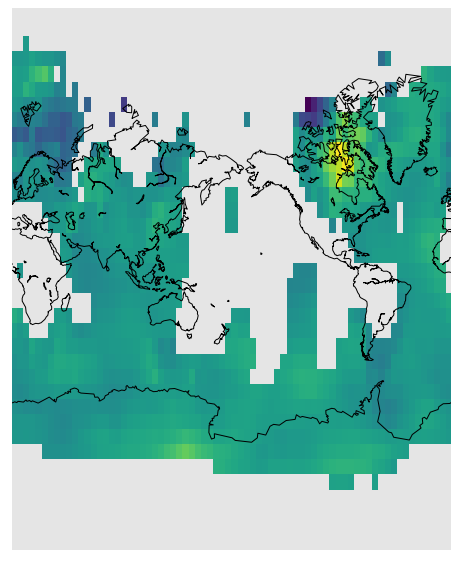

In [107]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='merc', llcrnrlon=lons[0], llcrnrlat=lats[0], urcrnrlon=lons[len(lons)-1], urcrnrlat=lats[len(lats)-1])
m.drawcoastlines()
m.imshow(dataset.variables['anom'][0,0,:,:]);

In [101]:
dataset.variables['anom'].shape

(1682, 1, 36, 72)

In [116]:
multi_month = dataset.variables['anom'][0:30,0,:,:]

In [117]:
avgs = []
for temp_grid in multi_month:
    avgs.append(temp_grid.mean())

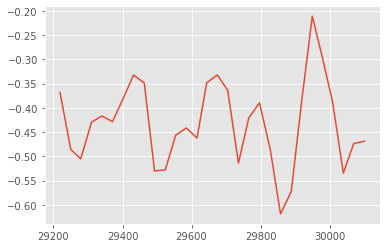

In [120]:
plt.plot(dataset.variables['time'][0:30], avgs);